# **Outlier Treatment**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/adityakumbhar/Developer/Datasets/raw_sales.csv')
df.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29580 entries, 0 to 29579
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   datesold      29580 non-null  object
 1   postcode      29580 non-null  int64 
 2   price         29580 non-null  int64 
 3   propertyType  29580 non-null  object
 4   bedrooms      29580 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


## **Outlier Detection**

### **Z-score Technique**

In [4]:
# defining function to find anamolies
def find_anamolies(data):

    anamolies = []

    # calculating mean and standard deviation
    random_data_std_dev = statistics.stdev(data)
    random_data_mean = statistics.mean(data)

    # calculating the limits
    random_data_limit = random_data_std_dev * 3 # 3 sigma
    lower_limit = random_data_mean - random_data_limit
    upper_limit = random_data_mean + random_data_limit

    for outlier in data:
        if(outlier > upper_limit or outlier < lower_limit):
            anamolies.append(outlier)
    
    return anamolies

In [5]:
df.price.head()

0    525000
1    290000
2    328000
3    380000
4    310000
Name: price, dtype: int64

In [6]:
anamolies = find_anamolies(df.price)
len(anamolies)

461

In [10]:
float(df.price.skew())

4.312009366902366

<Axes: xlabel='price', ylabel='Density'>

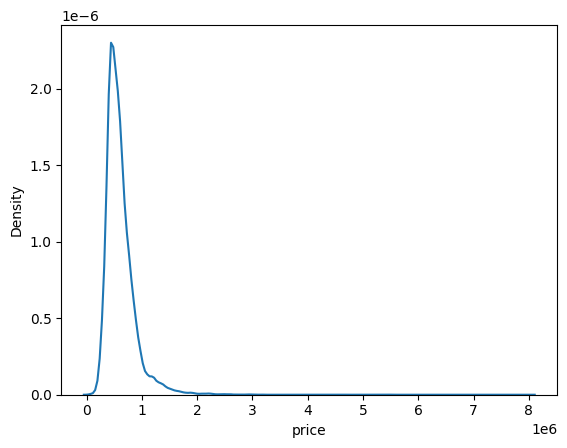

In [12]:
sns.kdeplot(df.price)

Transforming data

In [13]:
df['price_transformed'] = np.log(df.price)
df['price_transformed'].head()

0    13.171154
1    12.577636
2    12.700769
3    12.847927
4    12.644328
Name: price_transformed, dtype: float64

In [14]:
anamolies = find_anamolies(df['price_transformed'])
len(anamolies)

266

In [15]:
float(df.price_transformed.skew())

0.4731646269984763

<Axes: xlabel='price_transformed', ylabel='Density'>

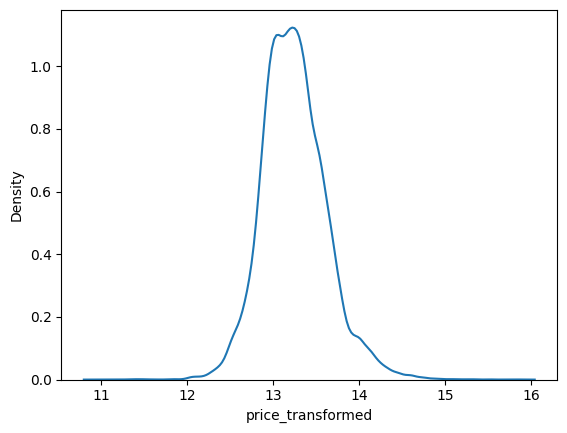

In [17]:
sns.kdeplot(df.price_transformed)

Double Transformation

In [18]:
df['price_double_transformed'] = np.log(df['price_transformed'])
df['price_double_transformed'].head()

0    2.578029
1    2.531920
2    2.541663
3    2.553182
4    2.537209
Name: price_double_transformed, dtype: float64

In [20]:
float(df['price_double_transformed'].skew())

0.33092530655758573

<Axes: xlabel='price_double_transformed', ylabel='Density'>

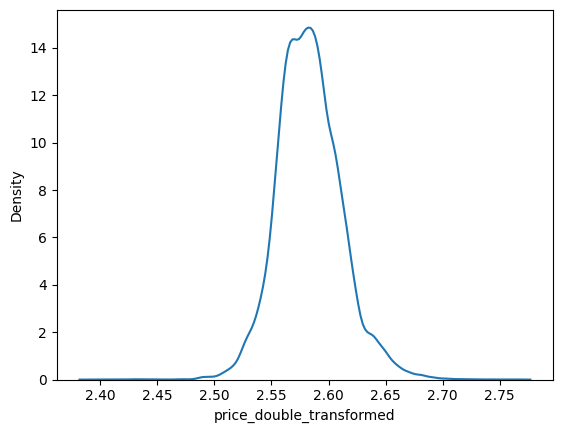

In [21]:
sns.kdeplot(df['price_double_transformed'])

Somewhere around below 40 and 80 are considered to be outliers

### **Box Plot Method**

<Axes: >

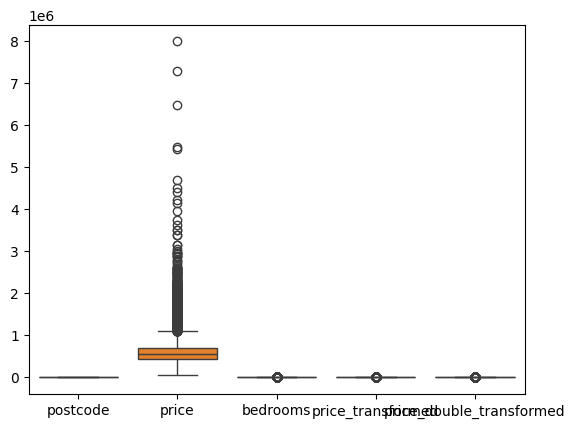

In [22]:
sns.boxplot(data=df)

Everything above 75 or below 25 is considered to be an outlier.

### **IQR Method**

In [23]:
list_1 = [12, 15, 14, 13, 16, 17, 14, 18, 15, 14, 16, 13, 15, 150, 13, 14, 15, 18, 14, 16, 13, 12, 17, 19, 200]
len(list_1)

25

In [24]:
max(list_1)

200

In [25]:
min(list_1)

12

In [26]:
statistics.mean(list_1)

27.72

In [28]:
list_1_sorted = sorted(list_1)
list_1_sorted

[12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 16,
 16,
 16,
 17,
 17,
 18,
 18,
 19,
 150,
 200]

Finding the 90th percentile of the data which is 0.9 * 25 (number of scores)  = 22.5 (index) = 23

In [29]:
list_1_sorted[23]

150

Finding the 30th percentile -> 0.3*25 = 7.5 = 8

In [30]:
list_1_sorted[8]

14

IQR = Q3-Q1   
75 percentile - 25 percentile.  

0.75*25 = 18.75 = 19.  
0.25 * 25 = 6.25 = 6

In [38]:
Q1 = np.percentile(list_1_sorted, 25)
Q3 = np.percentile(list_1_sorted, 75)

IQR = Q3-Q1
IQR

np.float64(3.0)

In [39]:
lower_bound = Q1-1.5*IQR
upper_bound = Q3+1.5*IQR

print(lower_bound, upper_bound)

9.5 21.5


any data point below 9.5 and above 21.5 is considered to be an outlier